<a href="https://colab.research.google.com/github/Bast-94/MLIC-Final-PW/blob/bug-fixing/bastien_hoorelbeke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction aux autoencodeurs

Ce notebook introduit les autoencodeurs dans le contexte de la compression d'images.

Un autoencodeur est un type spécial de réseau neuronal qui est entraîné à copier son entrée vers sa sortie. Par exemple, en donnant une image d'un chiffre écrit à la main, un autoencodeur encode d'abord l'image dans une représentation latente de dimension inférieure, puis décode la représentation latente pour obtenir une image. Un autoencodeur apprend à compresser les données tout en minimisant l'erreur de reconstruction.

Pour en savoir plus sur les autoencodeurs, vous pouvez envisager de lire le chapitre 14 du livre Deep Learning de Ian Goodfellow, Yoshua Bengio et Aaron Courville.

Le code du réseau d'auto encodeur est implémenté par [Sofiane Medjkoune](https://www.linkedin.com/in/smedjkoune/)

## Importation TensorFlow et autres libraires

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, Input
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Chargement du jeu de données
Pour commencer, nous allons entraîner l'autoencodeur de base en utilisant l'ensemble de données Fashion MNIST. Chaque image de cet ensemble de données mesure 28x28 pixels.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


**Pour commencer**


Cet exemple définit un autoencodeur avec deux couches Dense : un encodeur, qui compresse les images en un vecteur latent de dimension 64, et un décodeur, qui reconstruit l'image d'origine à partir de l'espace latent.

Pour définir notre modèle [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


In [ ]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([

      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Nous entraînons le modèle en utilisant `x_train` à la fois comme entrée et cible. L'encodeur apprendra à compresser l'ensemble de données de 784 dimensions vers l'espace latent, et le décodeur apprendra à reconstruire les images d'origine.

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.0240 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

Maintenant que le modèle est entraîné, testons-le en encodant et en décodant des images de l'ensemble de test.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

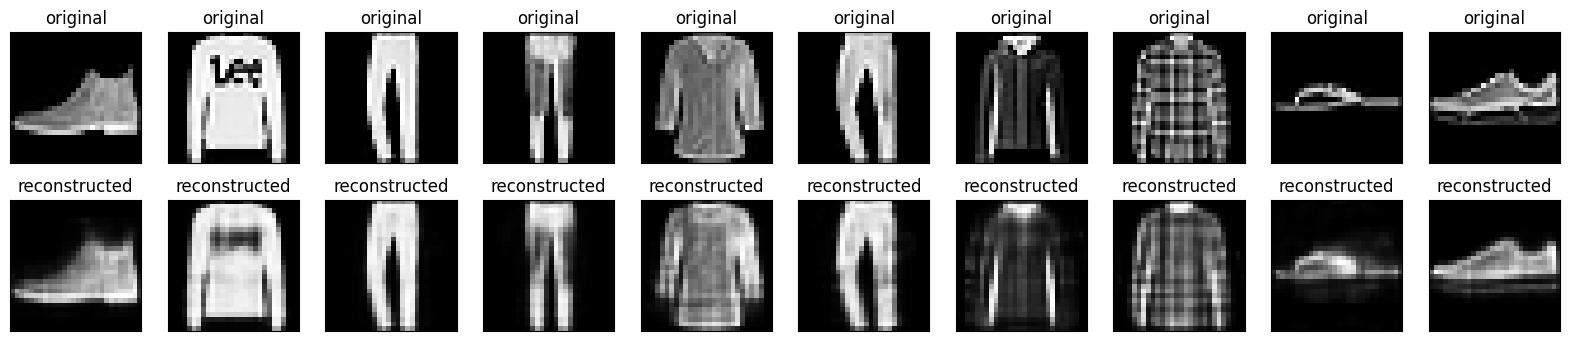

In [ ]:

def plot_results(x_test):
  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()
plot_results(x_test)

**Q1: Please describe the main steps in the code above to achieve image compression**
- Pré-traitement des données:
  - On commence par charger les train et test datasets qui contient des images de 28 x 28
  - On fait un pré-traitement en les mettant à l'échelle 1/255
- L'auto-encoder:
  - On définit un modèle qui hérite de `Model` Tensorflow
  - Il prend en paramètre une dimension latente `latent_dim` par défaut à 64
  - Les couches:
    - l'encodeur:
      - On fait un `Flatten` des images en 28 x 28
      - On le connecte à une couche Dense de `latent_dim` units avec une activation `relu`
    - le décodeur:
      - On connecte la précédent couche à une Dense de 784 unité avec une activation `sigmoid`
      - Enfin on redonne une shape 28 x 28 pour avoir une image résultante.
  - La propagation:
    - On encode l'image:
      - D'une image 28*28 on obtient un vecteur de dimension latente `latent_dim` qui va correspondre à un encodage de notre image dans une taille moins importante que cette dernière.
    - On décode l'image:
      - Depuis le vecteur d'encodage on va chercher à recréer l'image
- L'entrainement du modèle:
  - Ici la sortie attendue (l'équivalent d'un `y_train`) est l'image en elle-même (ici ce sont les `x_train` ) , c'est à dire à dire que le réseau doit s'ajuster pour qu'une image en entrée donne sa représentation avec le moins de perte en sortie.
  - On se donne 10 `epochs` d'entrainement et on applique le modèle à chaque itération sur le `test_set`

- Vérification "Humaine":
  - On applique l'encodage des `x_test`, on obtient les `encoded_img`
  - Avec les `encoded_img` on applique un décodage et on obtient les `decoded_img`
  - On affiche alors ces images



**Q2 : How is the compression quality for every image of the previous figure ? How can you measure it ? Is/are the metric(s) you defined correlated to the subjective perspective ?**

- En observant brièvement l'affichage des images enocdées puis décodées on observe un peu de bruit
- Ce pendant le but est évaluer numériquement la qualité de compression de chaque image. Pour ce faire on va se baser sur une métrique appelée "peak signal to noise ratio" (PSNR) qui se mesure selon la formule:

$$PSNR=20log_{10}(\frac{255}{\sqrt{MSE}})$$

Avec MSE l'erreur quadratique moyenne

- Une autre métrique pourrait être également structural similarity index (SSIM).


**Q3 : Implement a function to fine tune the auto-encoder parameters and achieve acceptable compression performance ? Please provide providence of your answers**

Pour le fine tuning je me réfère au rapport publié sur ce dépot git https://github.com/scelesticsiva/Neural-Networks-for-Image-Compression/tree/master

Le but est de "geler" l'`encoder` layer de notre auto encodeur déjà entrainé et d'ensuite entrainer son `decoder`.

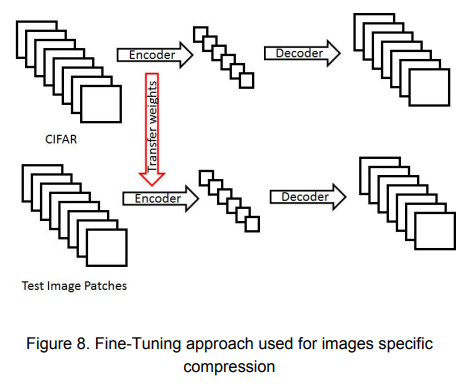

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - val_loss: 0.0094
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

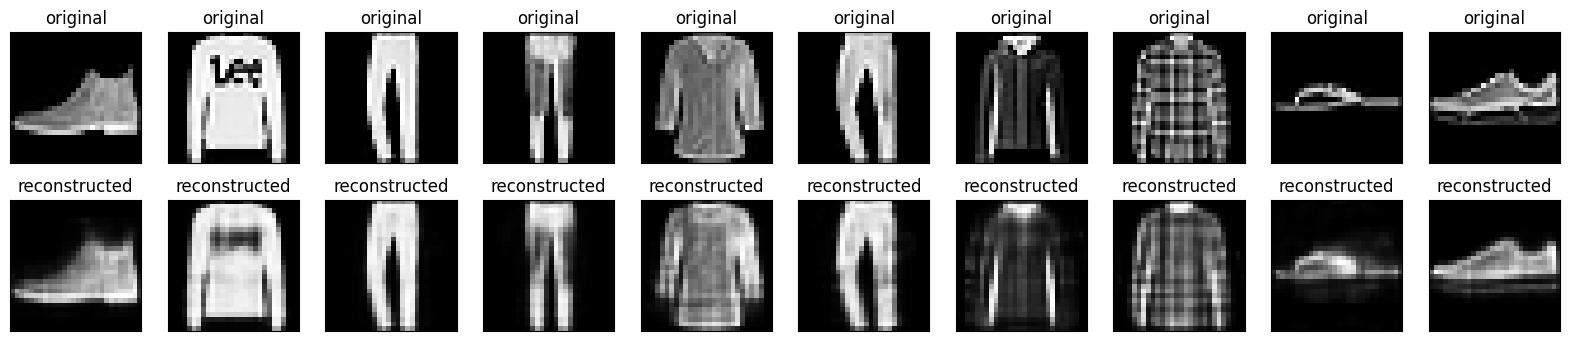

In [ ]:

def fine_tune(original_autoencoder: Autoencoder):
  new_auto_encoder = tf.keras.models.clone_model(original_autoencoder)
  new_auto_encoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  for layer in new_auto_encoder.encoder.layers:
    # Equivalence du transfer weight en gelant les poids
    layer.trainable = False
  # On relance un fitting qui s'appliquera uniquement sur le decoder
  new_auto_encoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
  return new_auto_encoder
new_auto_encoder = fine_tune(autoencoder)
plot_results(x_test)

***Q4 : Run compression on new aditionnal images. Can you conclude about model architecture VS images types / resolution.***

In [ ]:
!unzip data.zip

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [ ]:
!cd .. && ls

bin			    etc     media		      root  tools
boot			    home    mnt			      run   usr
content			    lib     NGC-DL-CONTAINER-LICENSE  sbin  var
cuda-keyring_1.0-1_all.deb  lib32   opt			      srv
datalab			    lib64   proc		      sys
dev			    libx32  python-apt		      tmp


In [ ]:
import os
import cv2
import numpy as np

def resize_image(image):
    resized_image = cv2.resize(image, (28, 28))
    return resized_image

image_dir = "data"
images = []

for filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = resize_image(image)
    images.append(resized_image)

images = np.array(images)
save_img = images
images = images.astype('float32') / 255.0
decoded_images = new_auto_encoder.predict(images)
decoded_images.shape

FileNotFoundError: ignored

In [ ]:
n = len(decoded_images)
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(save_img[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_images[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

**Observations globales**

On remarque que pour des images simples telles que les radios de pumons ou les chiffres manuscrits la reconstruction est plutôt proche de l'image originale. Ce qui est différent des autres images plus complexes comme la `kiwi.jpeg` dont la reconstitution n'est pas fidèle. Cela s'explique par le fait que notre Autoencodeur a été entrainé sur des images simples en terme de composants et de couleur.

**Q5 : Setup a simple search engine model to allow to retrieve an image using simple 2D matching. Based on this search engine, find maximum compression rate allowing to secure information retrieval**

In [ ]:
!find data



In [ ]:
def search_engine(img_file_path: str,images: np.ndarray , autoencoder : Autoencoder):

  input_image = cv2.imread(img_file_path, cv2.IMREAD_GRAYSCALE)
  input_image = resize_image(input_image)
  input_image = np.expand_dims(input_image, axis=0)
  input_image = input_image.astype('float32') / 255.0
  encoded_img = autoencoder.encoder.predict(input_image)
  for img in images:
    encoded_data_image = autoencoder.encoder.predict(img)
    distance = np.linalg.norm(encoded_img - encoded_data_image)

  #for image in images:
search_engine('data/covid-positive.jpeg',images,new_auto_encoder)